In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import DistanceMetric
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
from scipy.stats import spearmanr, pearsonr
from sklearn.metrics import mean_squared_error
from load_data import *
from util import *

%matplotlib inline

In [2]:
path = '/media/clo302/3TB_RAID/data/TCGA_embedding/'
ref_path = '/media/clo302/3TB_RAID/ref/TCGA_RNASeq/'

load data

In [3]:
fl1 = ['gemb_CN.csv', 'semb_CN.csv', 'semb_normal.csv']
fl2 = ['gemb_normal.csv', 'gemb_bias_CN.csv', 'gemb_bias_normal.csv', 'semb_bias_CN.csv', 'semb_bias_normal.csv']

In [4]:
gemb_CN, genes, semb_CN, sids_CN, semb_normal, sids_normal = load_data(path,  fl1, return_rn=True)
gemb_normal, gemb_bias_CN, gemb_bias_normal, semb_bias_CN, semb_bias_normal = load_data(path, fl2)

(20531, 50)
(9544, 50)
(701, 50)
(20531, 50)
(20531, 1)
(20531, 1)
(9544, 1)
(701, 1)


In [5]:
gene2idx = {g:i for i, g in enumerate(genes)}

In [6]:
sid2ca, ca_cats = load_sid2ca(ref_path)

len: 10245


In [7]:
rawlog2 = load_raw(ref_path)

reconstructed raw log2exp PCA, embeddings

In [8]:
pca = PCA(n_components=50)
raw_samp_pca = pca.fit(rawlog2.T).components_
raw_gene_pca = pca.fit(rawlog2).components_
print(raw_samp_pca.T.shape)
print(raw_gene_pca.T.shape)

(9544, 50)
(20531, 50)


In [9]:
recon_raw_samp_pca = undo_PCA(rawlog2.T, pca.fit(rawlog2.T), raw_samp_pca)
recon_raw_gene_pca = undo_PCA(rawlog2, pca.fit(rawlog2), raw_gene_pca)
recon_emb = emb2exp(semb_CN, gemb_CN, semb_bias_CN, gemb_bias_CN)

(20531, 9544)
(9544, 20531)
(9544, 20531)


## reconstructed raw PCA vs reconstructed embbedings

In [10]:
raw_r = [pearsonr(rawlog2[i], recon_raw_samp_pca[i])[0] for i in range(len(rawlog2))]
emb_r = [pearsonr(rawlog2[i], recon_emb[i])[0] for i in range(len(rawlog2))]

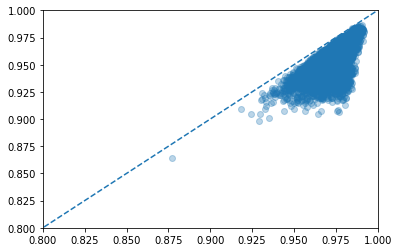

In [11]:
plt.scatter(raw_r, emb_r, alpha=0.3)
plt.plot([0,1], [0,1], linestyle='--')
plt.xlim([0.8,1])
plt.ylim([0.8,1])
plt.show()

In [12]:
print(mean_squared_error(rawlog2, recon_raw_samp_pca))
print(mean_squared_error(rawlog2, recon_emb))

0.9043974546643665
54.5011045174313


## sample PCA

In [13]:
ca2col = {c: col for c, col in zip(ca_cats, sns.color_palette('hsv', n_colors=len(ca_cats)))}
ca = [sid2ca[s] for s in sids_CN]

In [14]:
pca = PCA(n_components=3)

#### raw log2exp

In [17]:
rawlog2_samp_pca = pca.fit(rawlog2.T).components_; rawlog2_samp_pca.shape

(3, 9544)

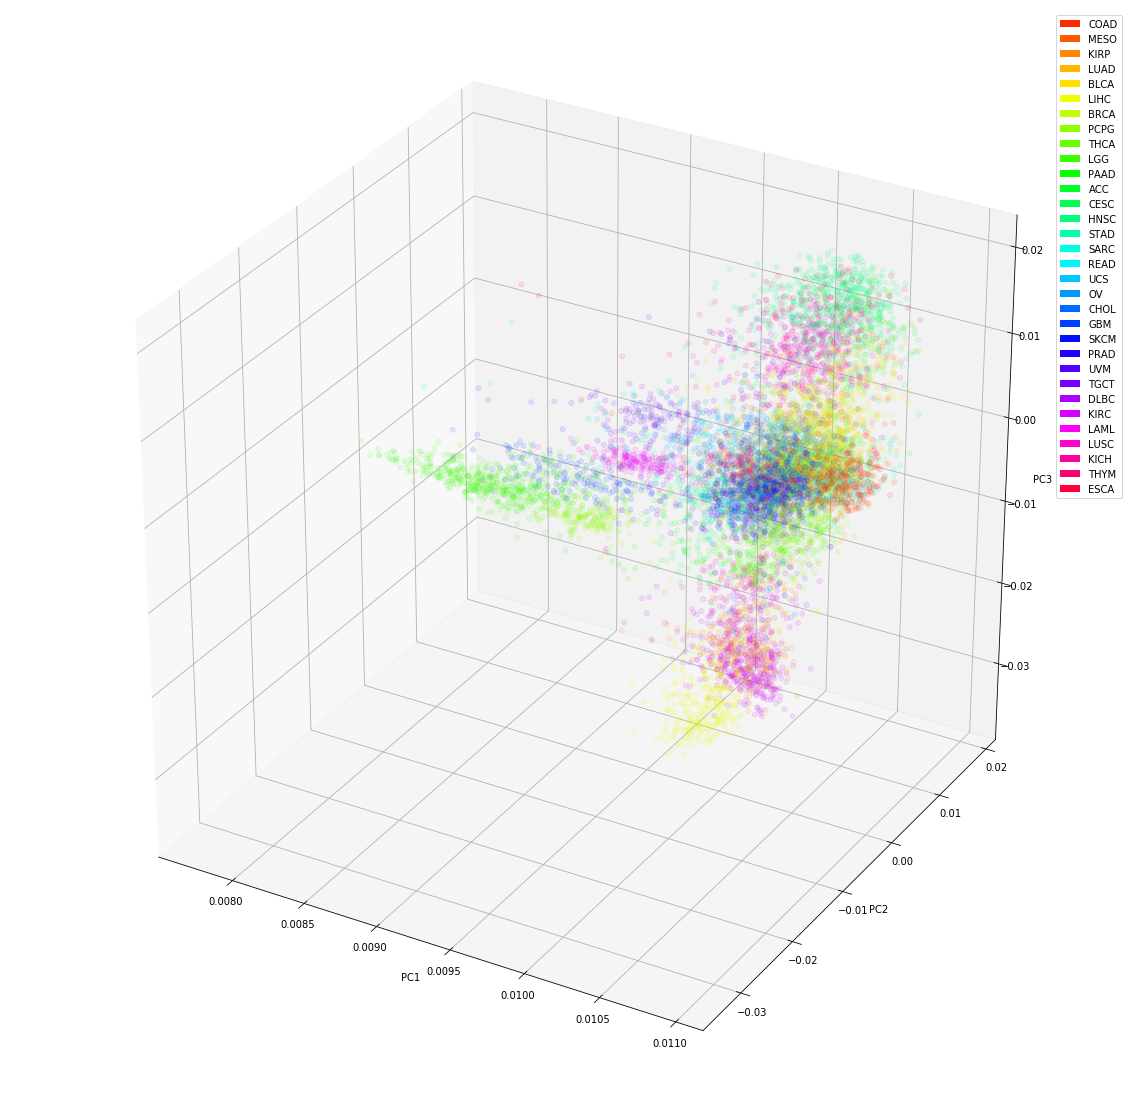

In [13]:
plot_samp_3dPCA(rawlog2_samp_pca, ca, ca2col)

#### semb CN

In [18]:
semb_pca = pca.fit(semb_CN.T).components_; semb_pca.shape

(3, 9544)

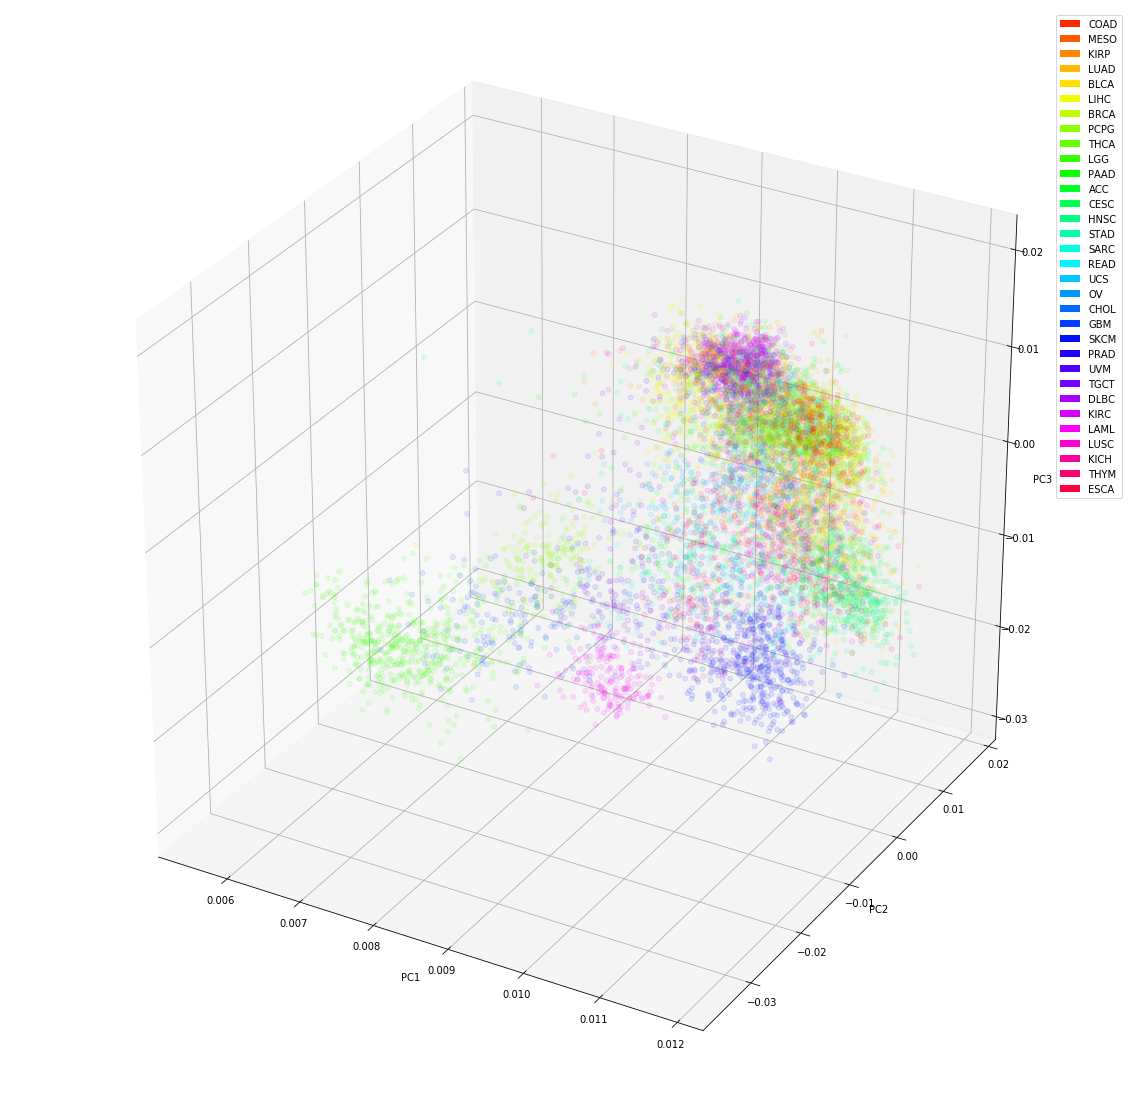

In [15]:
plot_samp_3dPCA(semb_pca, ca, ca2col)

#### reconstructed raw log2exp PCA

In [19]:
raw_samp_pca_pca = pca.fit(raw_samp_pca).components_; raw_samp_pca_pca.shape

(3, 9544)

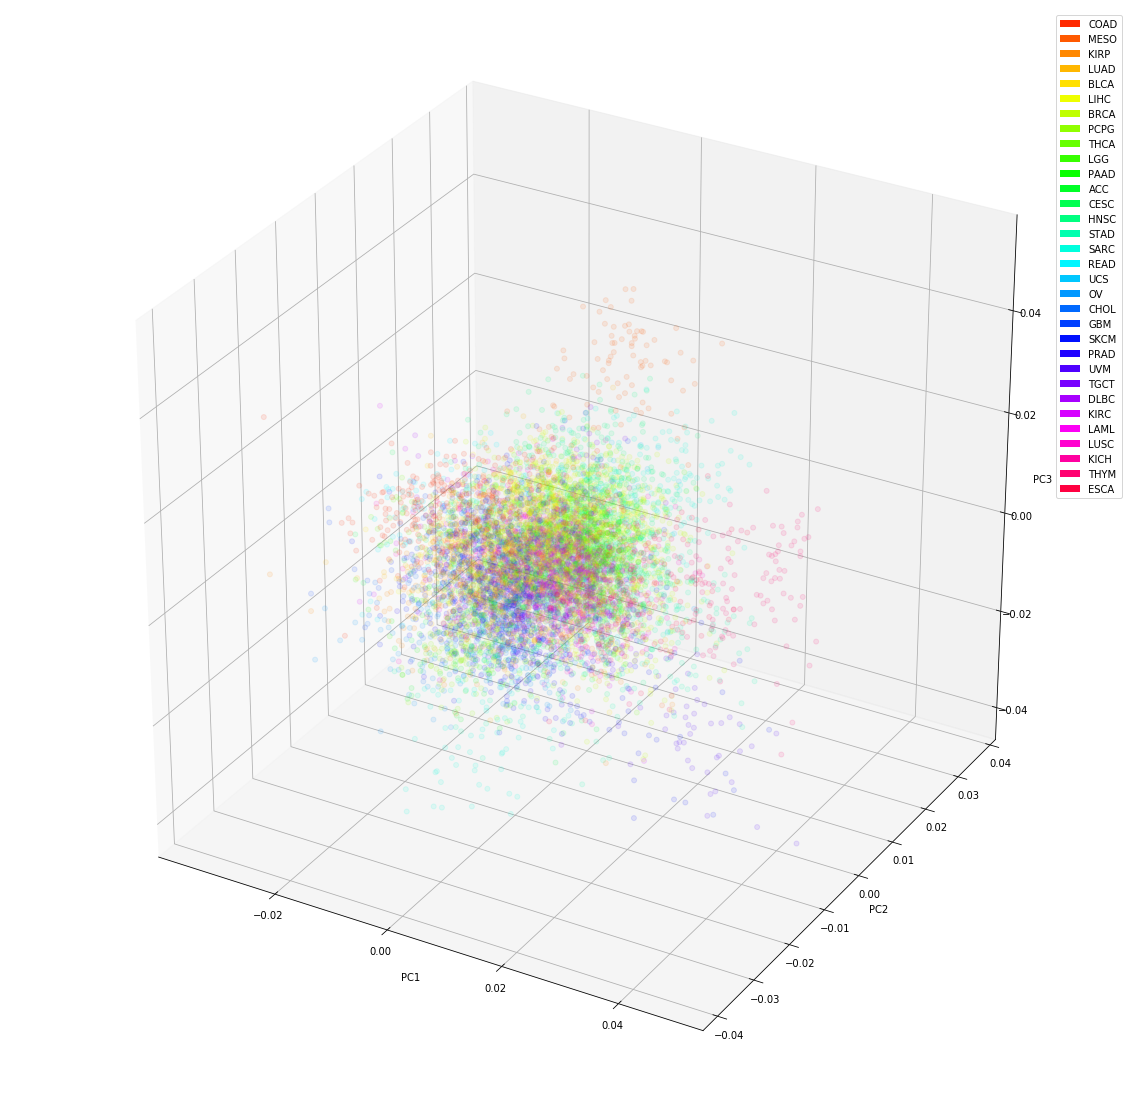

In [19]:
plot_samp_3dPCA(raw_samp_pca_pca, ca, ca2col)

### hbp PCA

In [15]:
hbpabbr = ['LIHC', 'CHOL', 'PAAD']
hbp_idxs = [i for i, s in enumerate(sids_CN) if sid2ca[s] in hbpabbr]
hbp_ca = [sid2ca[s] for s in sids_CN if sid2ca[s] in hbpabbr]
hbp2col = {'LIHC':'g', 'PAAD':'b', 'CHOL':'r'}

#### hbp - semb CN

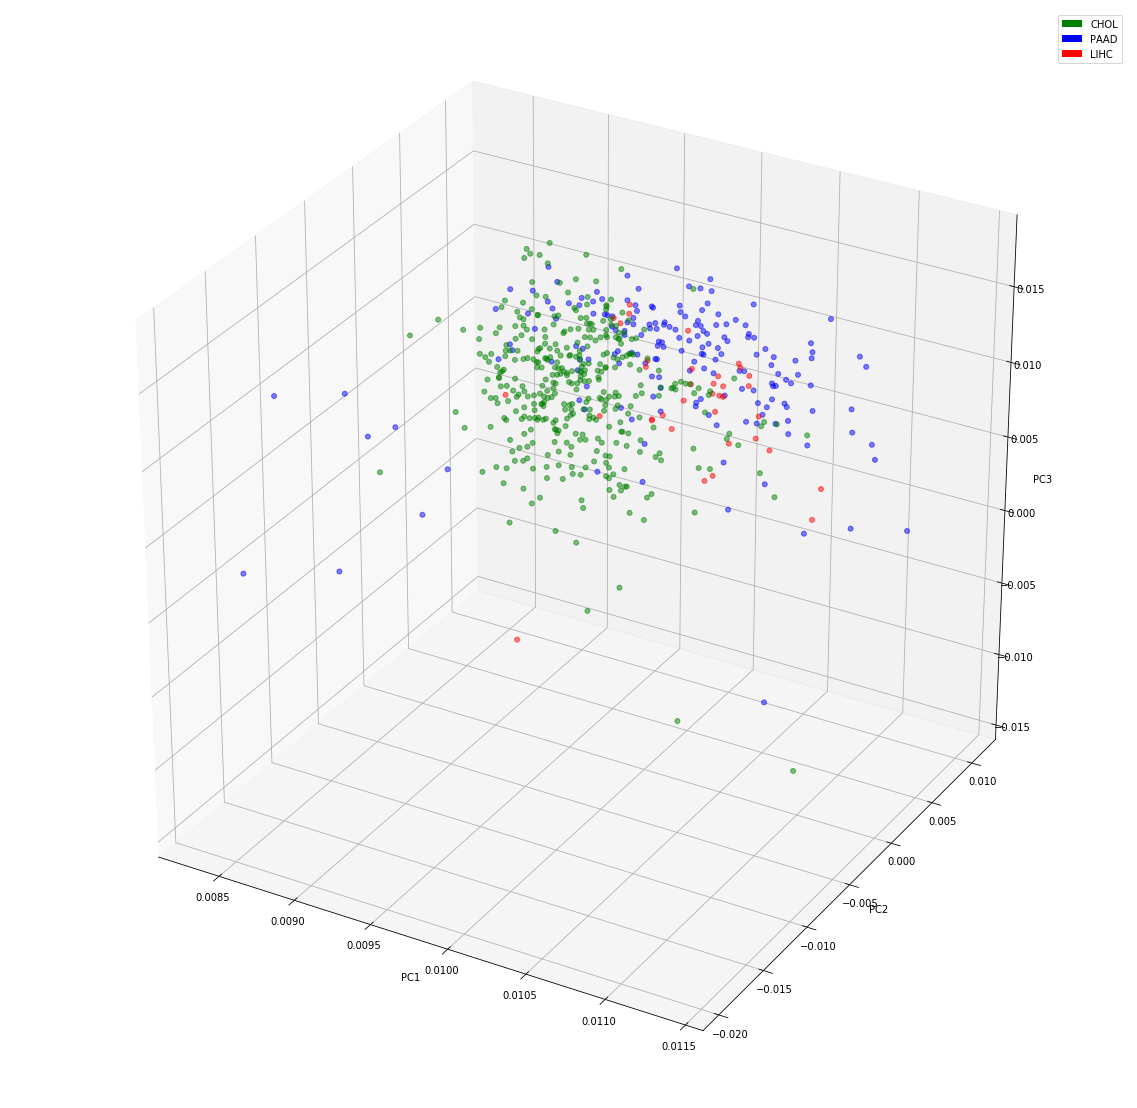

In [20]:
plot_samp_3dPCA(semb_pca, hbp_ca, hbp2col, subset_idxs=hbp_idxs, alpha=0.5)

#### hbp - reconstructed raw log2exp PCA

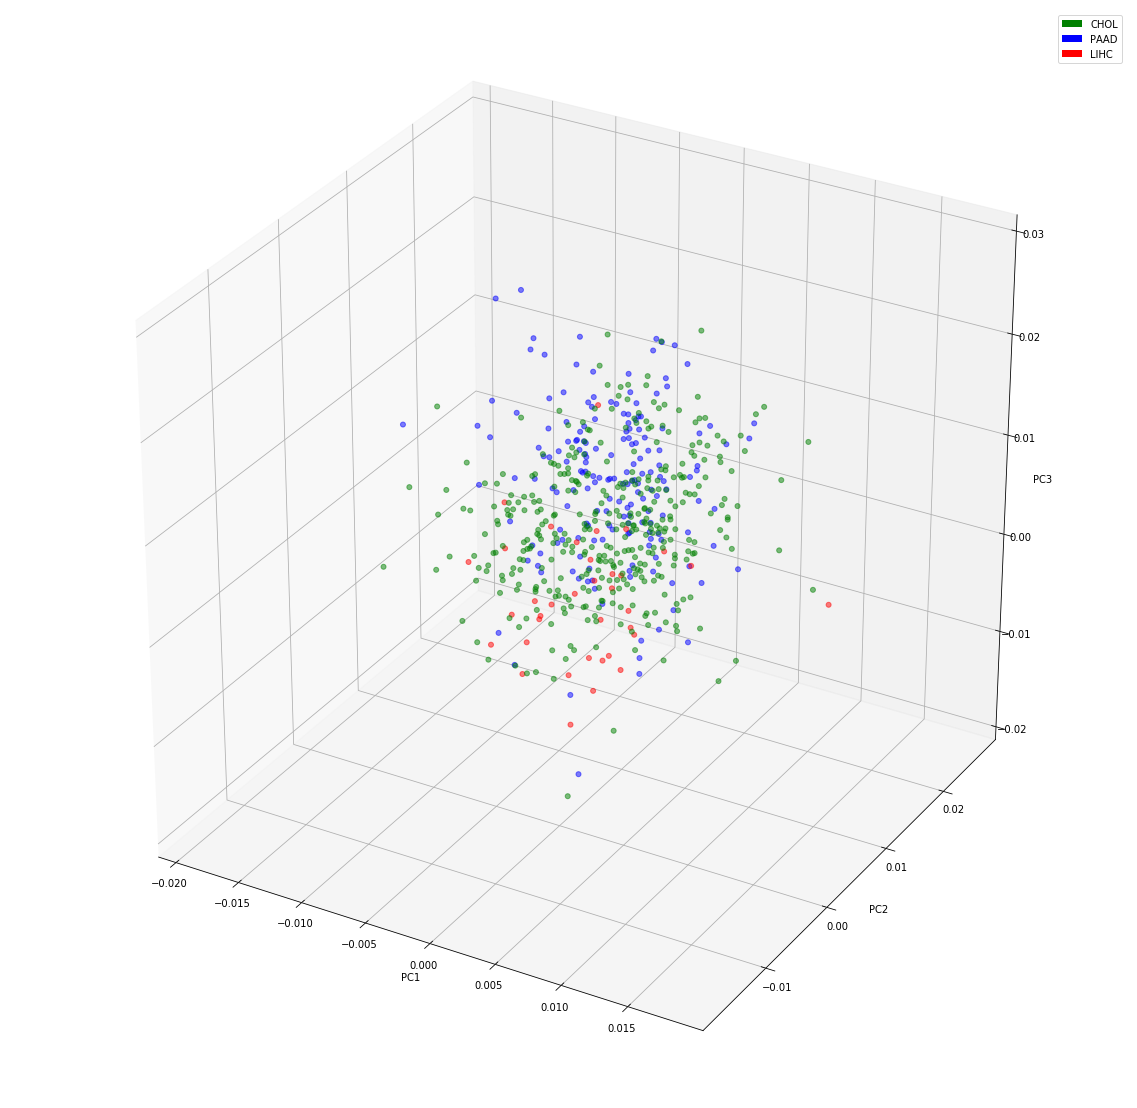

In [21]:
plot_samp_3dPCA(raw_samp_pca_pca, hbp_ca, hbp2col, subset_idxs=hbp_idxs, alpha=0.5)

## gene PCA

In [14]:
pca = PCA(n_components=3)

In [24]:
hk_genes = ['GAPDH', 'ACTB', 'B2M']
hk_idxs = [gene2idx[g] for g in hk_genes]
g1_genes = ['CCNE1', 'CCNE2', 'CDK2']
g1_idxs = [gene2idx[g] for g in g1_genes]
dd_genes = ['SIRT6', 'CHD1L', 'MRE11A']
dd_idxs = [gene2idx[g] for g in dd_genes]
hl_idxs = [hk_idxs, g1_idxs, dd_idxs]

#### raw log2exp

In [25]:
rawlog2_gene_pca = pca.fit(rawlog2).components_; rawlog2_gene_pca.shape

(3, 20531)

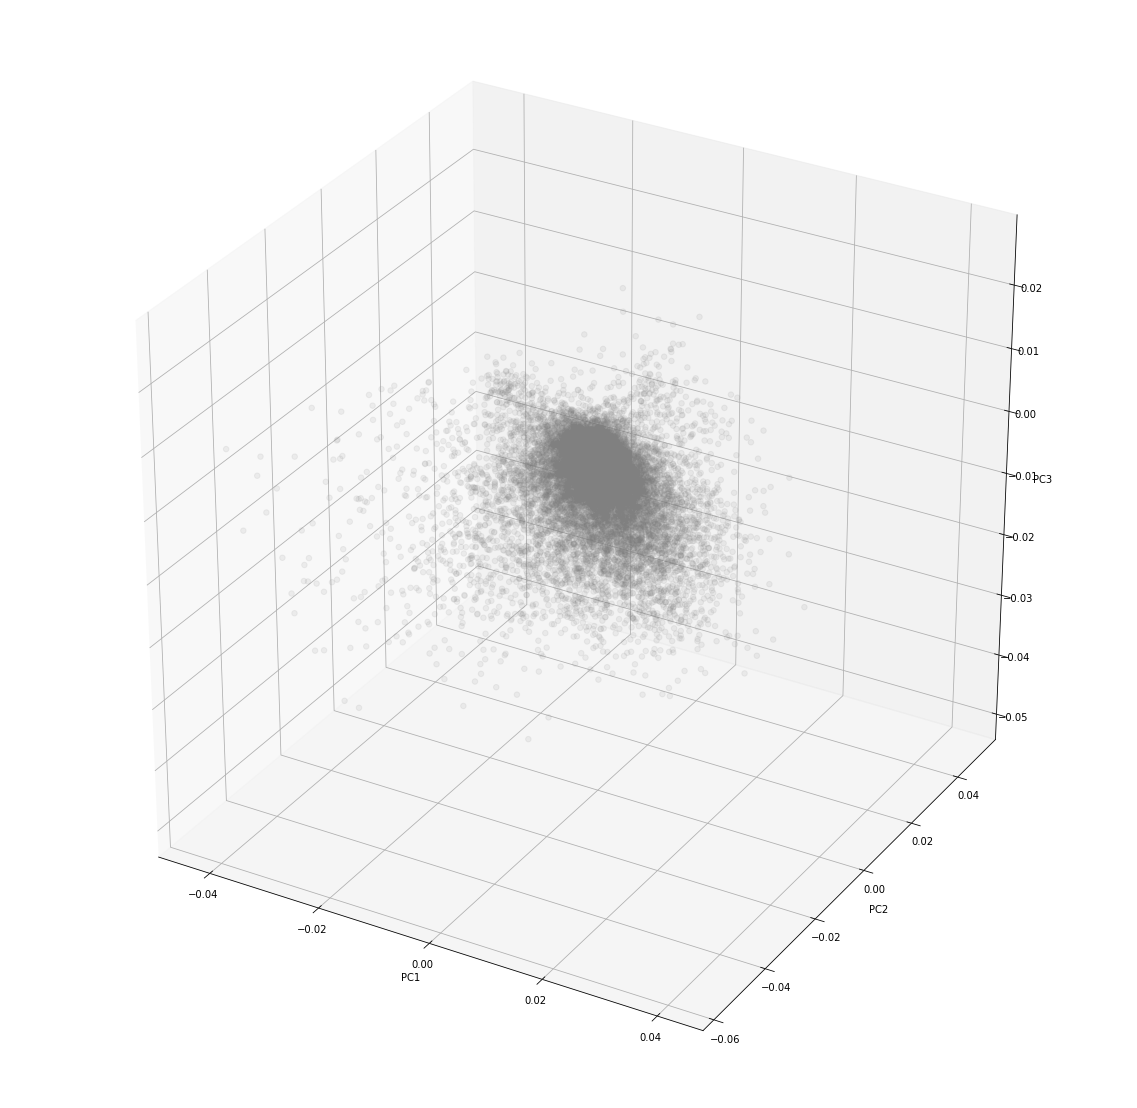

In [53]:
plot_gene_3dPCA(rawlog2_gene_pca, genes)

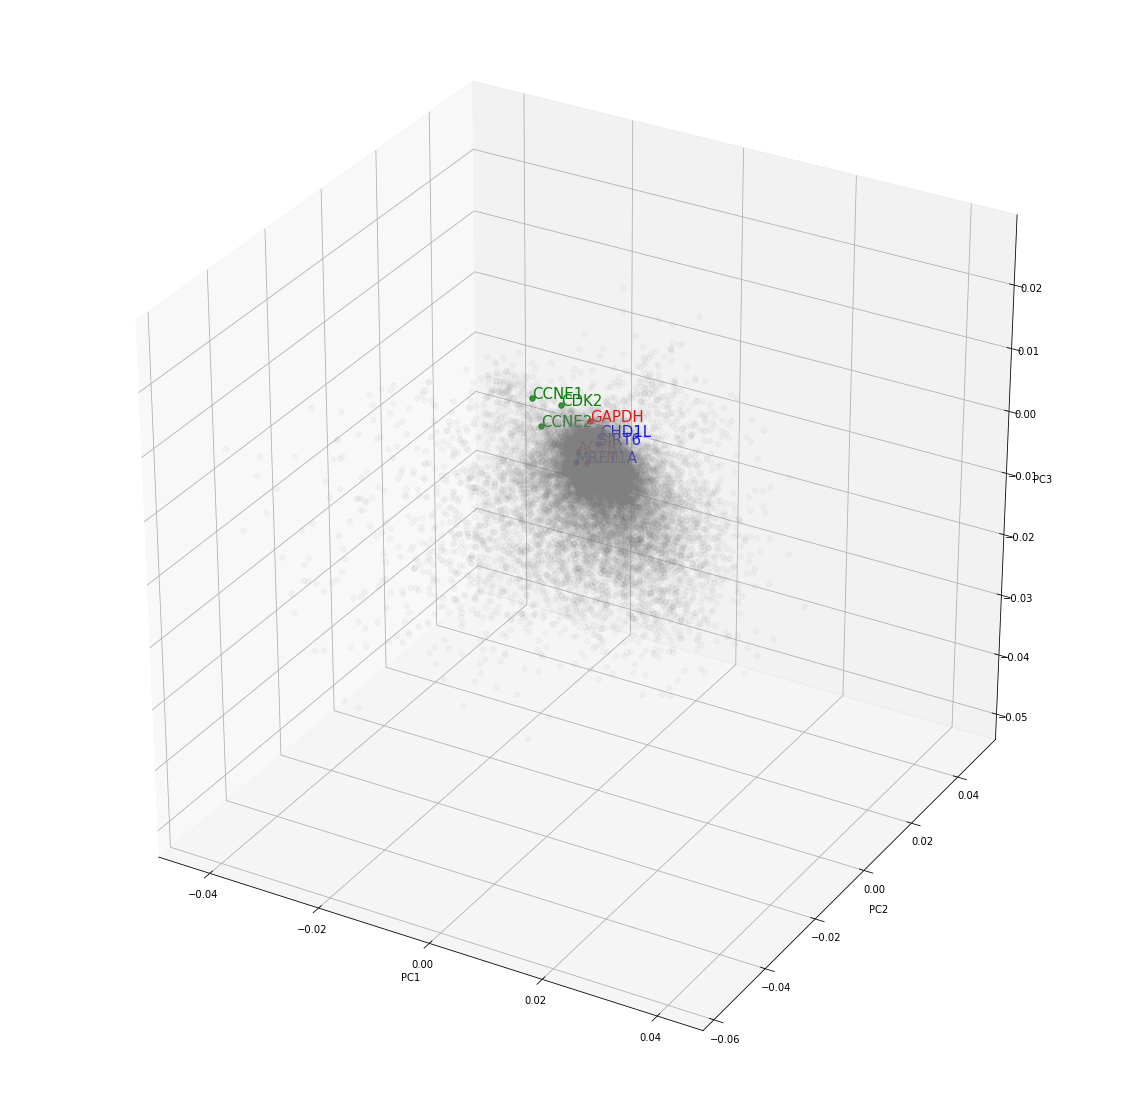

In [33]:
plot_gene_3dPCA(rawlog2_gene_pca, genes, hl_idxs=hl_idxs, bgalpha=0.05, hlfs=15)

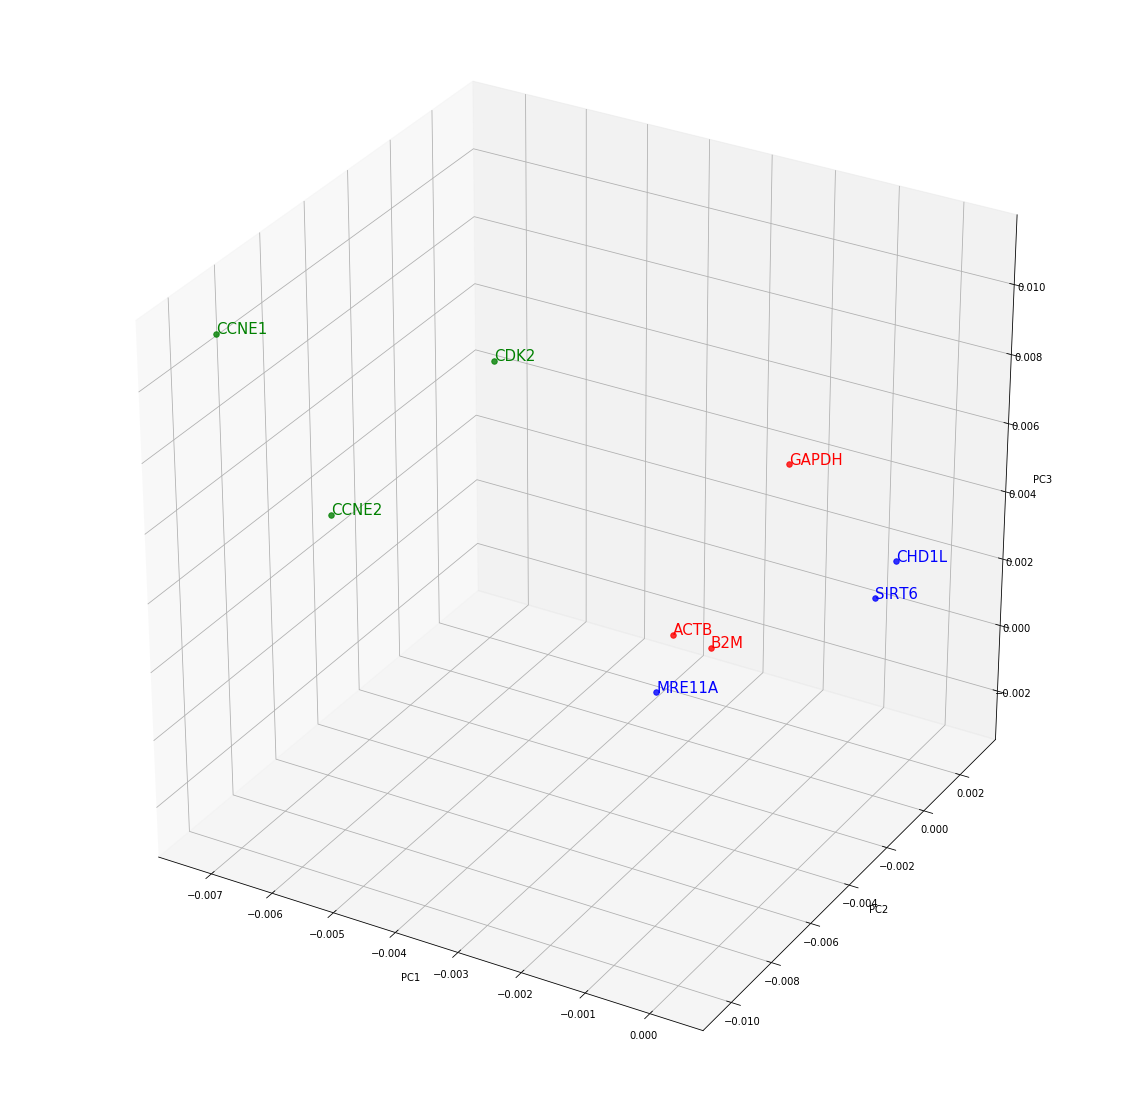

In [30]:
plot_gene_3dPCA(rawlog2_gene_pca, genes, hl_idxs=hl_idxs, showbg=False, hlfs=15)

#### gemb CN

In [15]:
gemb_pca = pca.fit(gemb_CN.T).components_; gemb_pca.shape

(3, 20531)

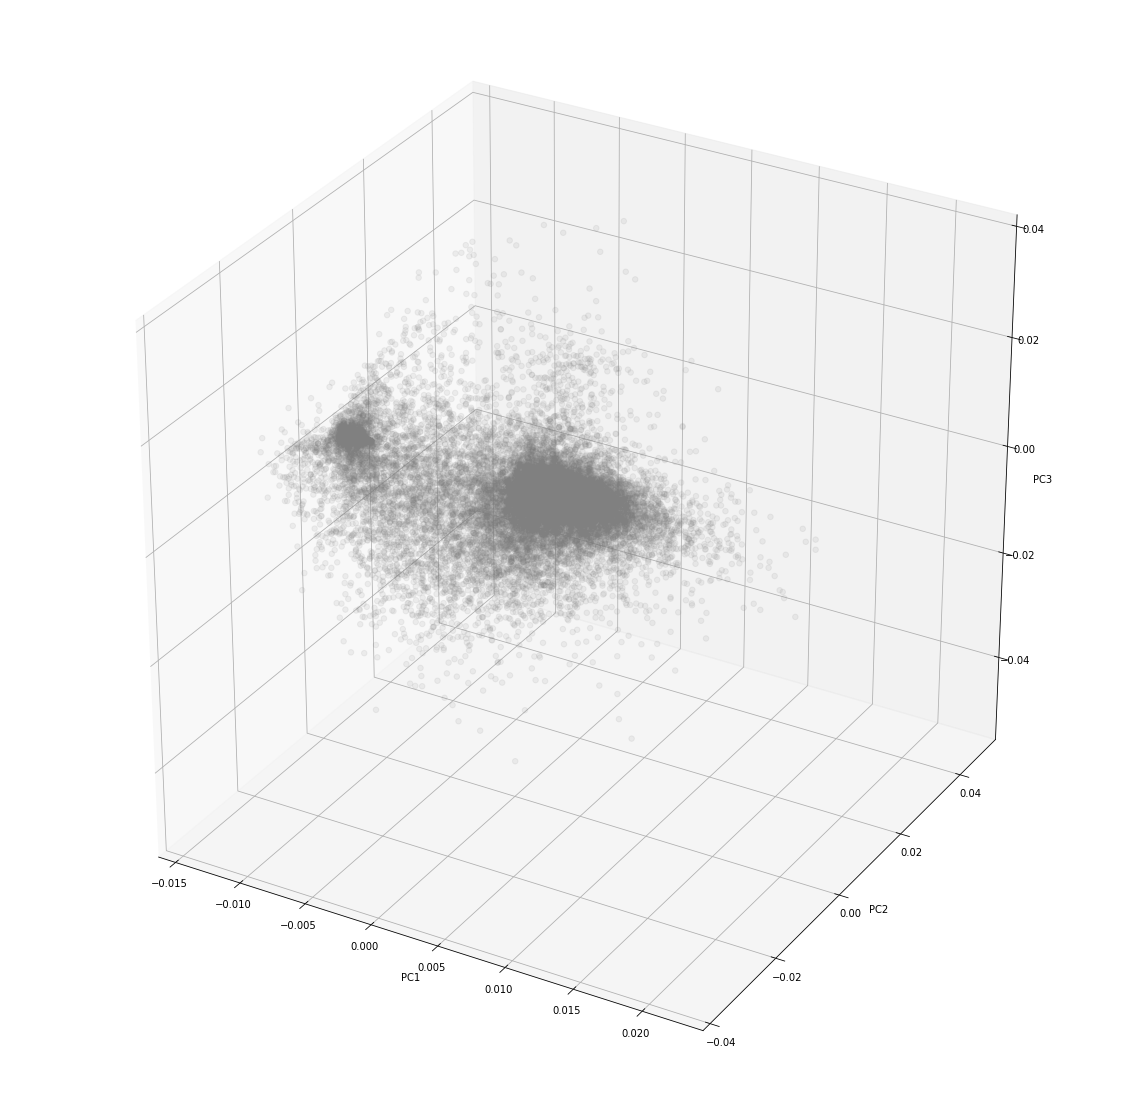

In [57]:
plot_gene_3dPCA(gemb_pca, genes)

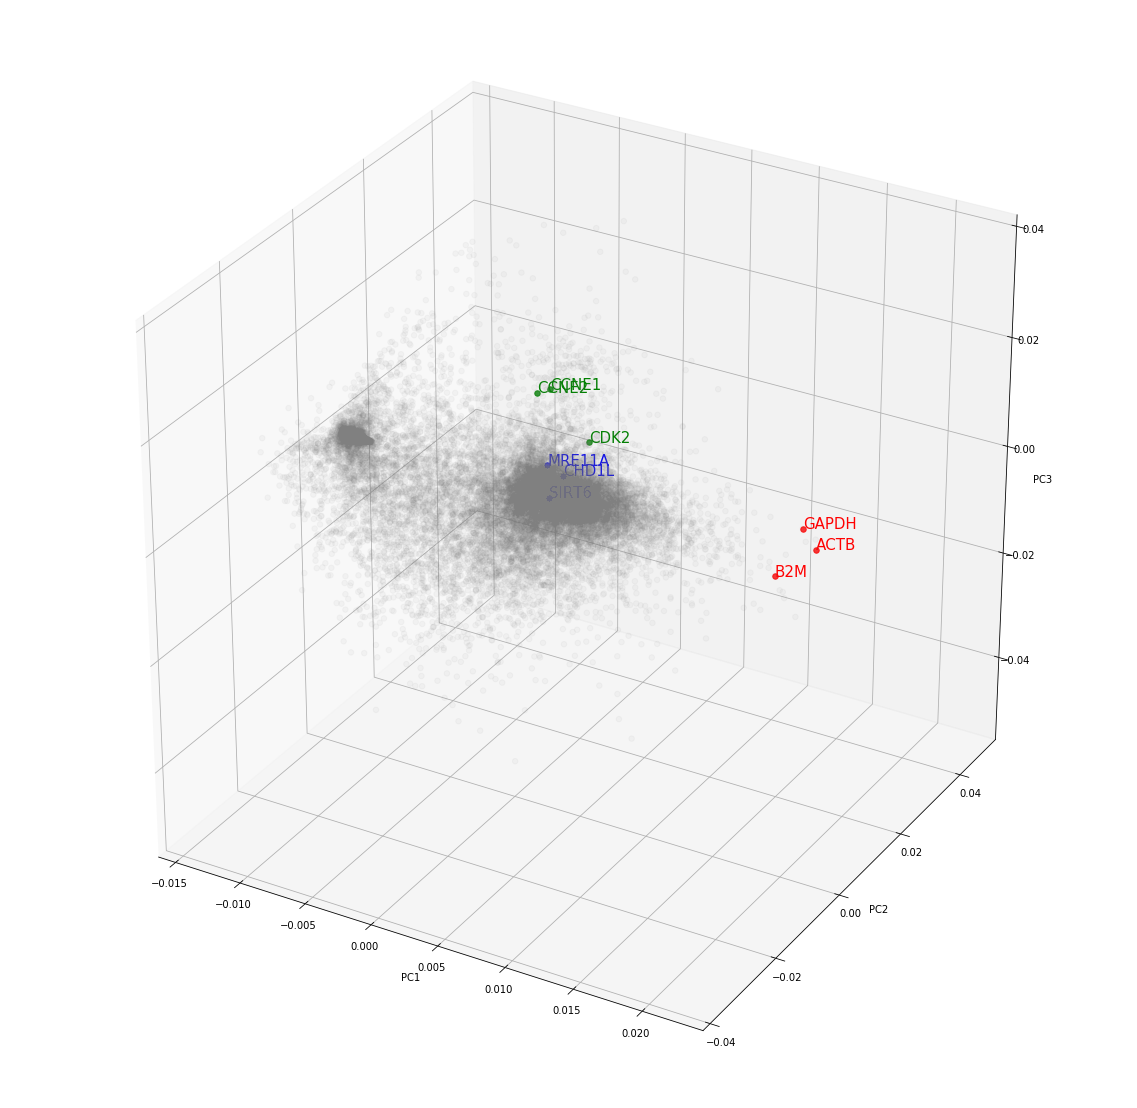

In [32]:
plot_gene_3dPCA(gemb_pca, genes, hl_idxs=hl_idxs, hlfs=15, bgalpha=0.05)

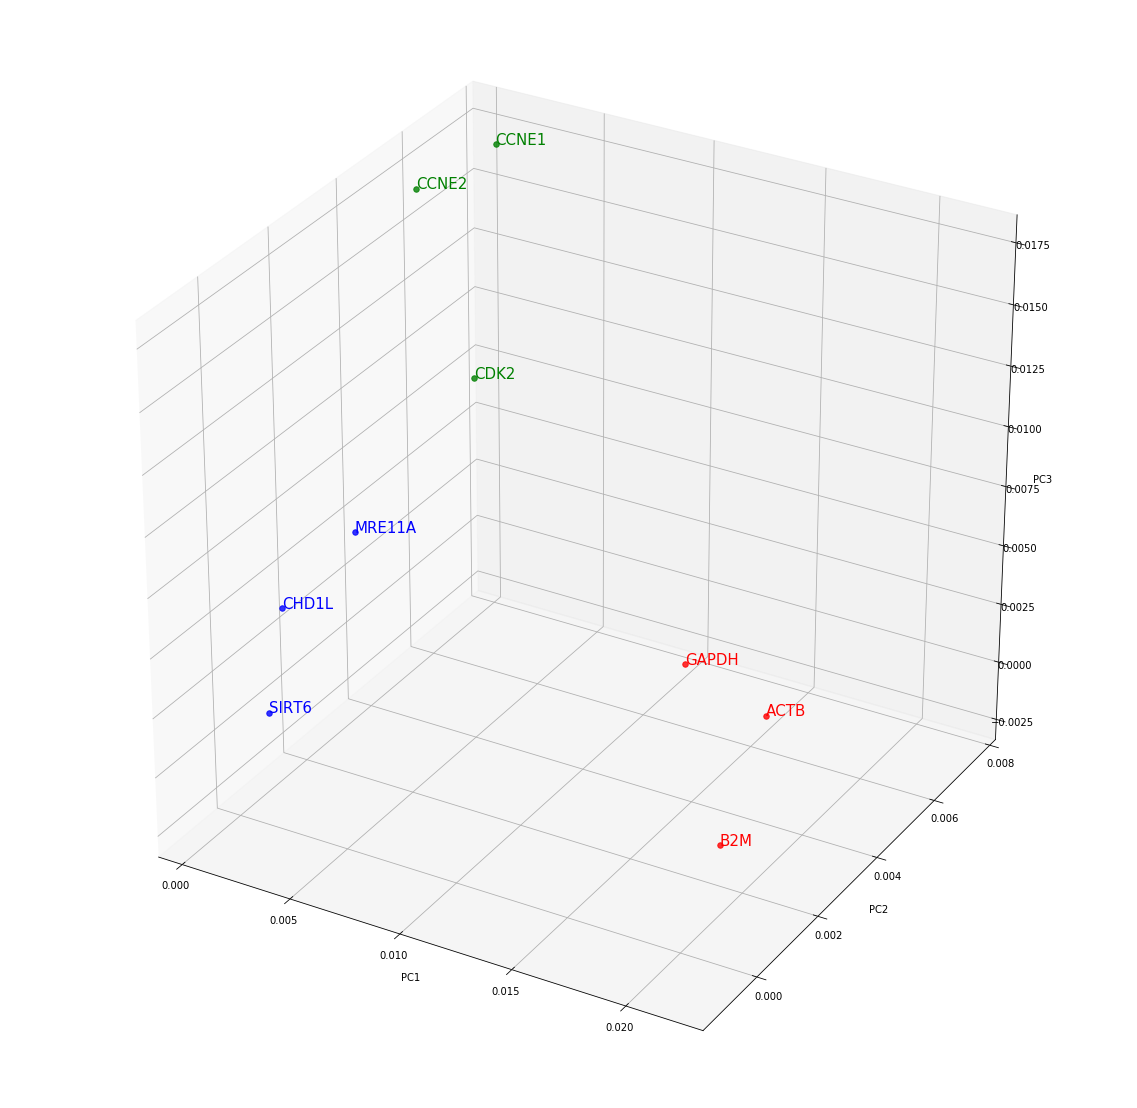

In [28]:
plot_gene_3dPCA(gemb_pca, genes, hl_idxs=hl_idxs, showbg=False, hlfs=15)

#### reconstrcuted raw log2exp

In [27]:
raw_gene_pca_pca = pca.fit(raw_gene_pca).components_; raw_gene_pca_pca.shape

(3, 20531)

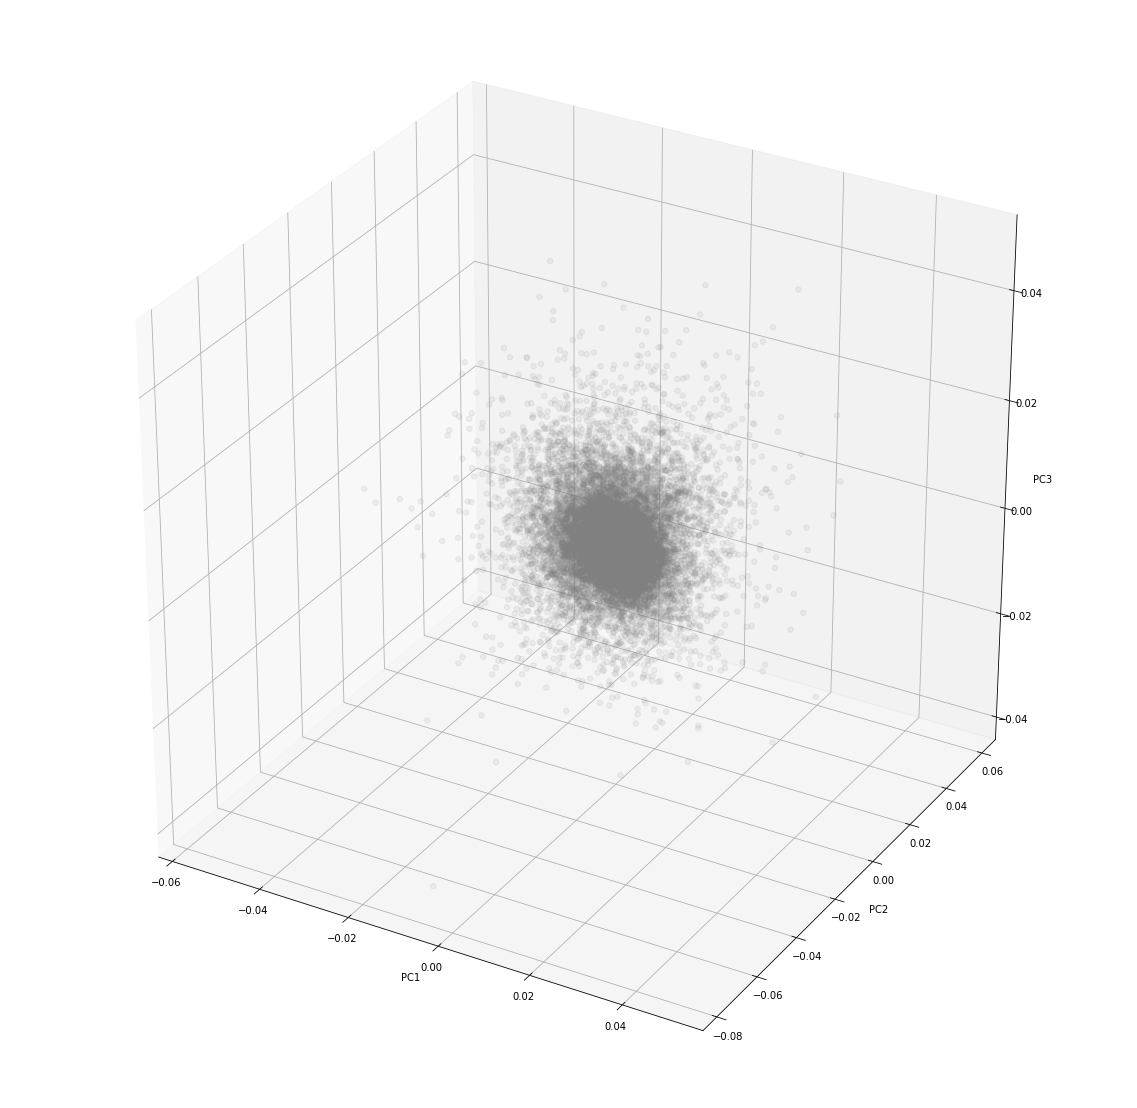

In [61]:
plot_gene_3dPCA(raw_gene_pca_pca, genes)

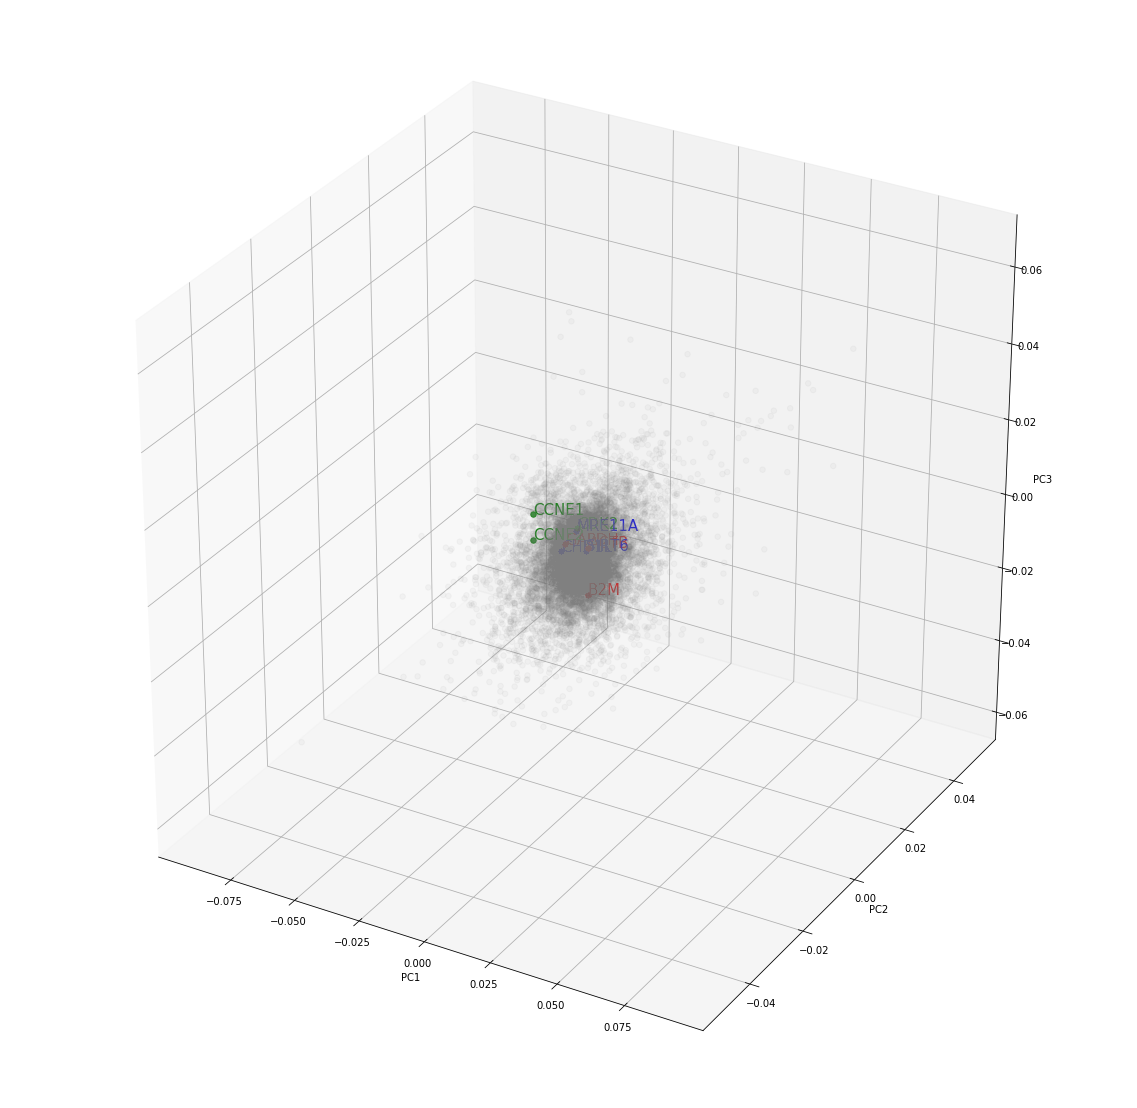

In [34]:
plot_gene_3dPCA(raw_gene_pca_pca, genes, hl_idxs=hl_idxs, bgalpha=0.05, hlfs=15)

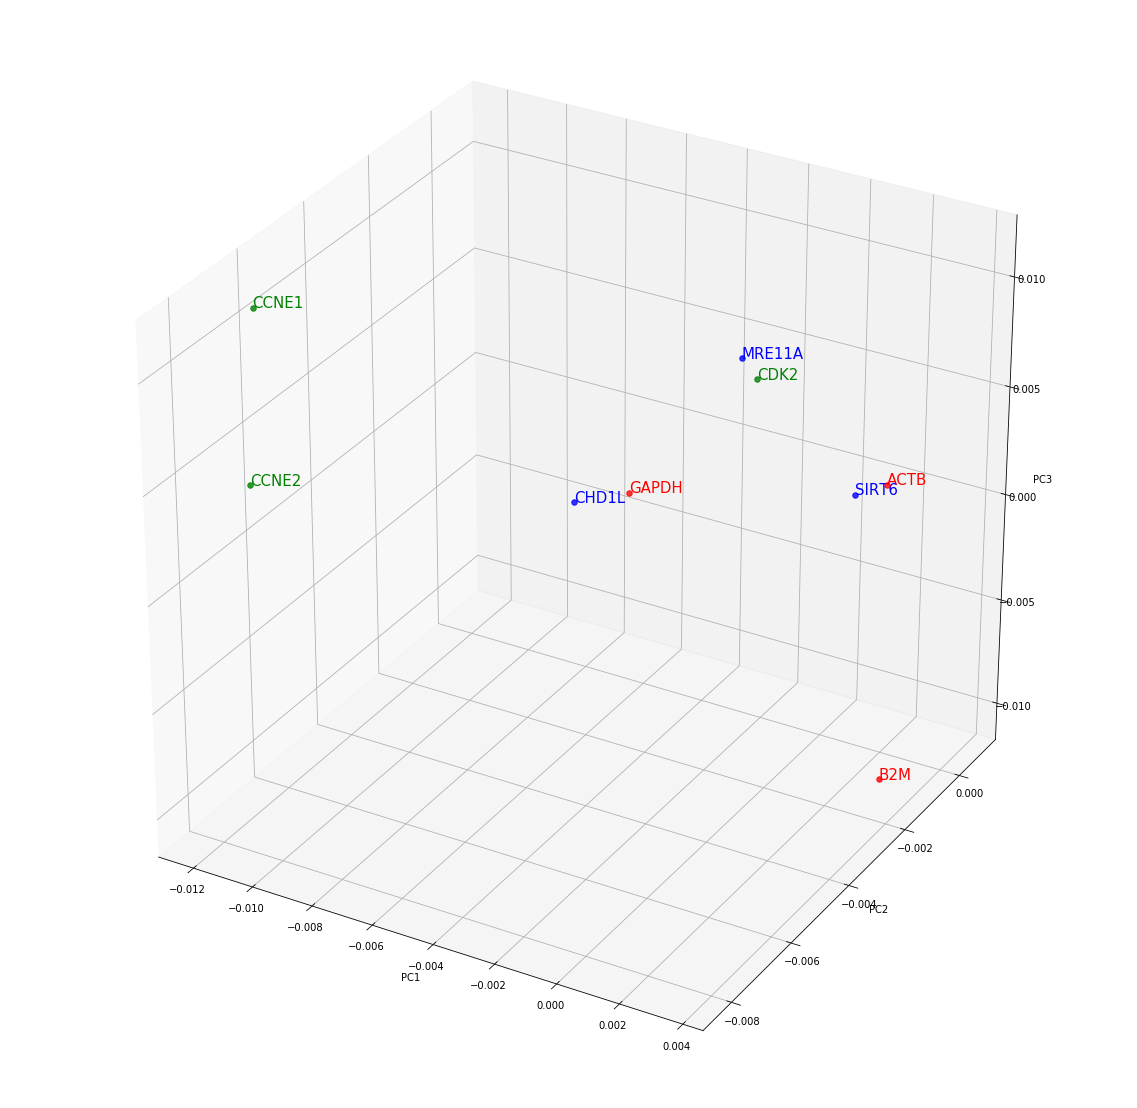

In [29]:
plot_gene_3dPCA(raw_gene_pca_pca, genes, hl_idxs=hl_idxs, showbg=False, hlfs=15)

### tSNE

In [64]:
tsne = TSNE(n_components=3, verbose=1, perplexity=5, n_iter=50000)

In [65]:
semb_tsne = tsne.fit_transform(semb_CN)

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 9544 samples in 0.032s...
[t-SNE] Computed neighbors for 9544 samples in 2.856s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9544
[t-SNE] Computed conditional probabilities for sample 2000 / 9544
[t-SNE] Computed conditional probabilities for sample 3000 / 9544
[t-SNE] Computed conditional probabilities for sample 4000 / 9544
[t-SNE] Computed conditional probabilities for sample 5000 / 9544
[t-SNE] Computed conditional probabilities for sample 6000 / 9544
[t-SNE] Computed conditional probabilities for sample 7000 / 9544
[t-SNE] Computed conditional probabilities for sample 8000 / 9544
[t-SNE] Computed conditional probabilities for sample 9000 / 9544
[t-SNE] Computed conditional probabilities for sample 9544 / 9544
[t-SNE] Mean sigma: 0.087552
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.422386
[t-SNE] Error after 36750 iterations: 1.181658


In [66]:
ca2col = {c: col for c, col in zip(ca_cats, sns.color_palette('hsv', n_colors=len(ca_cats)))}
ca = [sid2ca[s] for s in sids_CN]

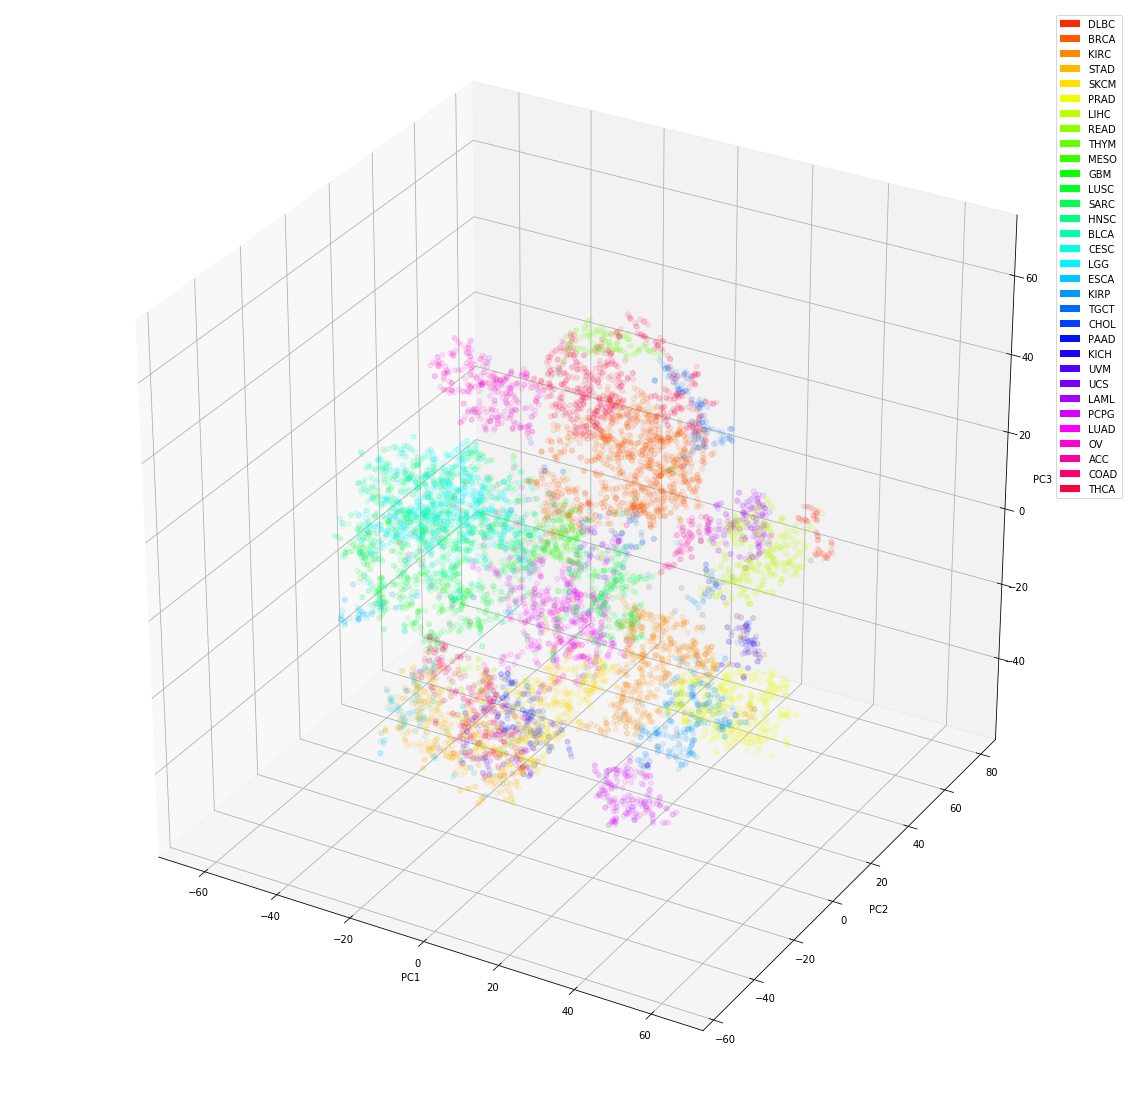

In [68]:
plot_samp_3dPCA(semb_tsne.T, ca, ca2col)

## heatmap

### gemb, semb

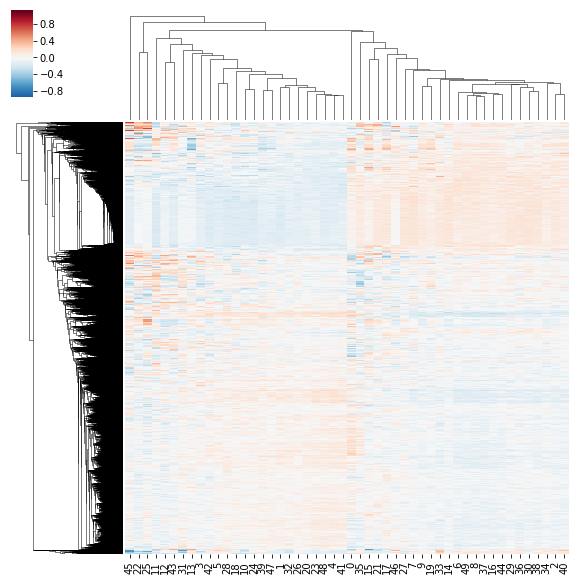

In [35]:
sns.clustermap(gemb_CN, xticklabels=True, yticklabels=False, cmap='RdBu_r', center=0)

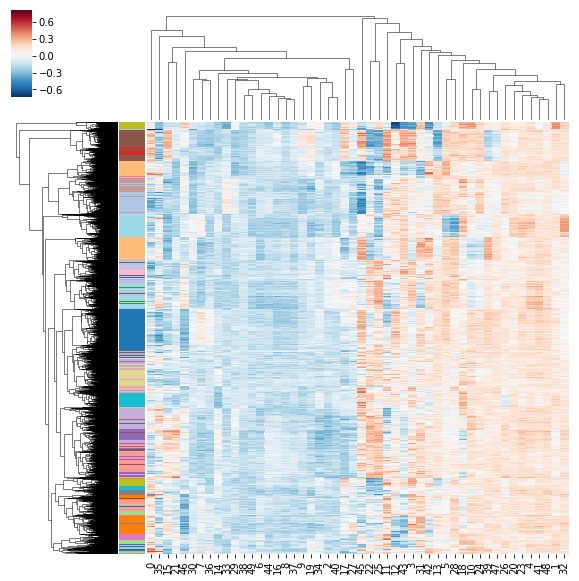

In [28]:
cmap = plt.get_cmap('tab20')
colors = cmap(np.linspace(0, 1, len(ca_cats)))
ca2col = dict(zip(ca_cats, colors))
row_colors = [ca2col[sid2ca[s]] for s in sids_CN]
sns.clustermap(semb_CN, xticklabels=True, yticklabels=False, 
               cmap='RdBu_r', row_colors=row_colors)

In [29]:
arr_centroid = [find_centroid(semb_CN, sid2ca, sids_CN, cancer=c) for c in ca_cats]
semb_centroid_df = pd.DataFrame(arr_centroid, index=ca_cats)

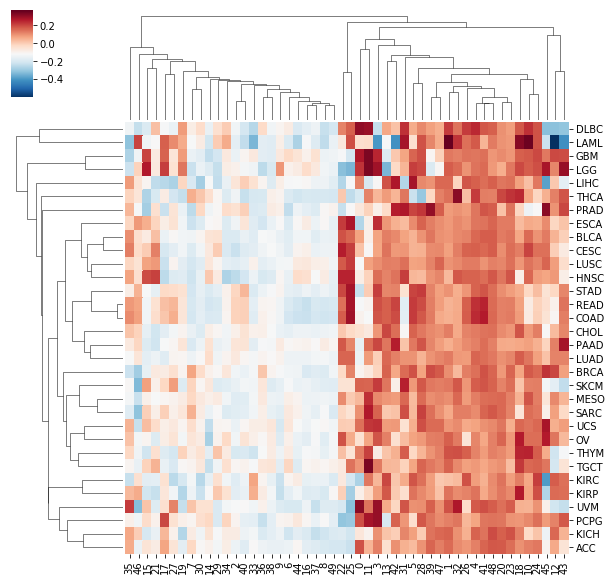

In [30]:
sns.clustermap(semb_centroid_df, xticklabels=True, yticklabels=True, 
               cmap='RdBu_r')

#### raw samp PCA heatmap

In [37]:
arr_centroid = [find_centroid(raw_samp_pca.T, sid2ca, sids_CN, cancer=c) for c in ca_cats]
raw_samp_pca_centroid_df = pd.DataFrame(arr_centroid, index=ca_cats)

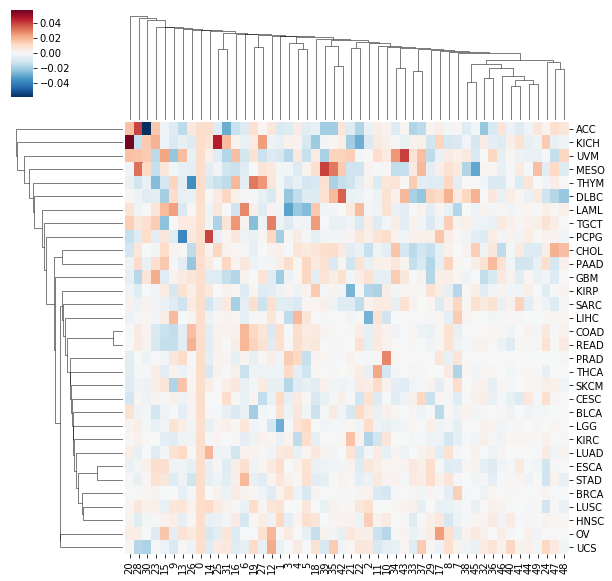

In [38]:
sns.clustermap(raw_samp_pca_centroid_df, xticklabels=True, yticklabels=True, 
               cmap='RdBu_r', center=0)

## emb properties demo

In [9]:
gemb_CN_dist,_,_ = get_emb_dist(gemb_CN, return_pd=False)

shape: (20531, 20531); mean: 0.943; std: 0.317


In [10]:
raw_gene_pca_dist,_,_ = get_emb_dist(raw_gene_pca.T, return_pd=False)

shape: (20531, 20531); mean: 0.063; std: 0.030


In [ ]:
#pca = PCA(n_components=3)
#gemb_pca = pca.fit(gemb_CN.T).components_

In [ ]:
#hl_genes = ['PIK3CA', 'AKT1', 'AKT2', 'MTOR', 'RPS6KB1', 'EIF4EBP1']
#hl_idxs = [gene_idx[g] for g in hl_genes]

In [ ]:
#lv1_genes = ['EGFR', 'FGFR1', 'FGFR2', 'FGFR3', 'FGFR4', 'PDGFRA', 'PDGFRB']
#lv2_genes = ['JAK1', 'JAK2', 'JAK3', 'TYK2']
#lv3_genes = ['STAT1', 'STAT2', 'STAT3', 'STAT4', 'STAT5A', 'STAT5B', 'STAT6']

In [ ]:
#print_gdist('RPTOR', 'MLST8')
#print_gdist('RICTOR', 'MLST8')
#print_gdist('RPTOR', 'MAPKAP1')
#print_gdist('RICTOR', 'MAPKAP1')

In [37]:
print_gdist('PIK3CA', 'AKT1', gemb_CN_dist, gene2idx)
print_gdist('PIK3CA', 'AKT2', gemb_CN_dist, gene2idx)
print_gdist('PIK3CA', 'AKT3', gemb_CN_dist, gene2idx)
print_gdist('AKT1', 'MTOR', gemb_CN_dist, gene2idx)
print_gdist('AKT2', 'MTOR', gemb_CN_dist, gene2idx)
print_gdist('AKT3', 'MTOR', gemb_CN_dist, gene2idx)
print_gdist('MTOR', 'RPS6KB1', gemb_CN_dist, gene2idx)
print_gdist('MTOR', 'MAPKAP1', gemb_CN_dist, gene2idx)

0.7466625853108455
0.6288427969922927
0.790980927914105
0.46806087221884474
0.38594239622707943
0.7123283619183238
0.45036748865744536
0.4106369894393207


In [49]:
print_gdist('PIK3CA', 'AKT1', raw_gene_pca_dist, gene2idx)
print_gdist('PIK3CA', 'AKT2', raw_gene_pca_dist, gene2idx)
print_gdist('PIK3CA', 'AKT3', raw_gene_pca_dist, gene2idx)
print_gdist('AKT1', 'MTOR', raw_gene_pca_dist, gene2idx)
print_gdist('AKT2', 'MTOR', raw_gene_pca_dist, gene2idx)
print_gdist('AKT3', 'MTOR', raw_gene_pca_dist, gene2idx)
print_gdist('MTOR', 'RPS6KB1', raw_gene_pca_dist, gene2idx)
print_gdist('MTOR', 'MAPKAP1', raw_gene_pca_dist, gene2idx)

0.03605158726233317
0.033275407158883455
0.044212665017837466
0.027629700939375938
0.024896855304817188
0.046786793902912516
0.030506160256291943
0.025539053091815124


In [11]:
lv1_genes = ['PIK3CA']
lv2_genes = ['AKT1', 'AKT2', 'AKT3']
lv3_genes = ['MTOR']
#lv3_genes = ['MTOR',  'RPTOR', 'MLST8', 'RICTOR', 'MAPKAP1']
lv4_genes = ['RPS6KB1', 'MAPKAP1']
lv1_idxs = [gene2idx[g] for g in lv1_genes]
lv2_idxs = [gene2idx[g] for g in lv2_genes]
lv3_idxs = [gene2idx[g] for g in lv3_genes]
lv4_idxs = [gene2idx[g] for g in lv4_genes]
hl_idxs = [lv1_idxs, lv2_idxs, lv3_idxs, lv4_idxs]

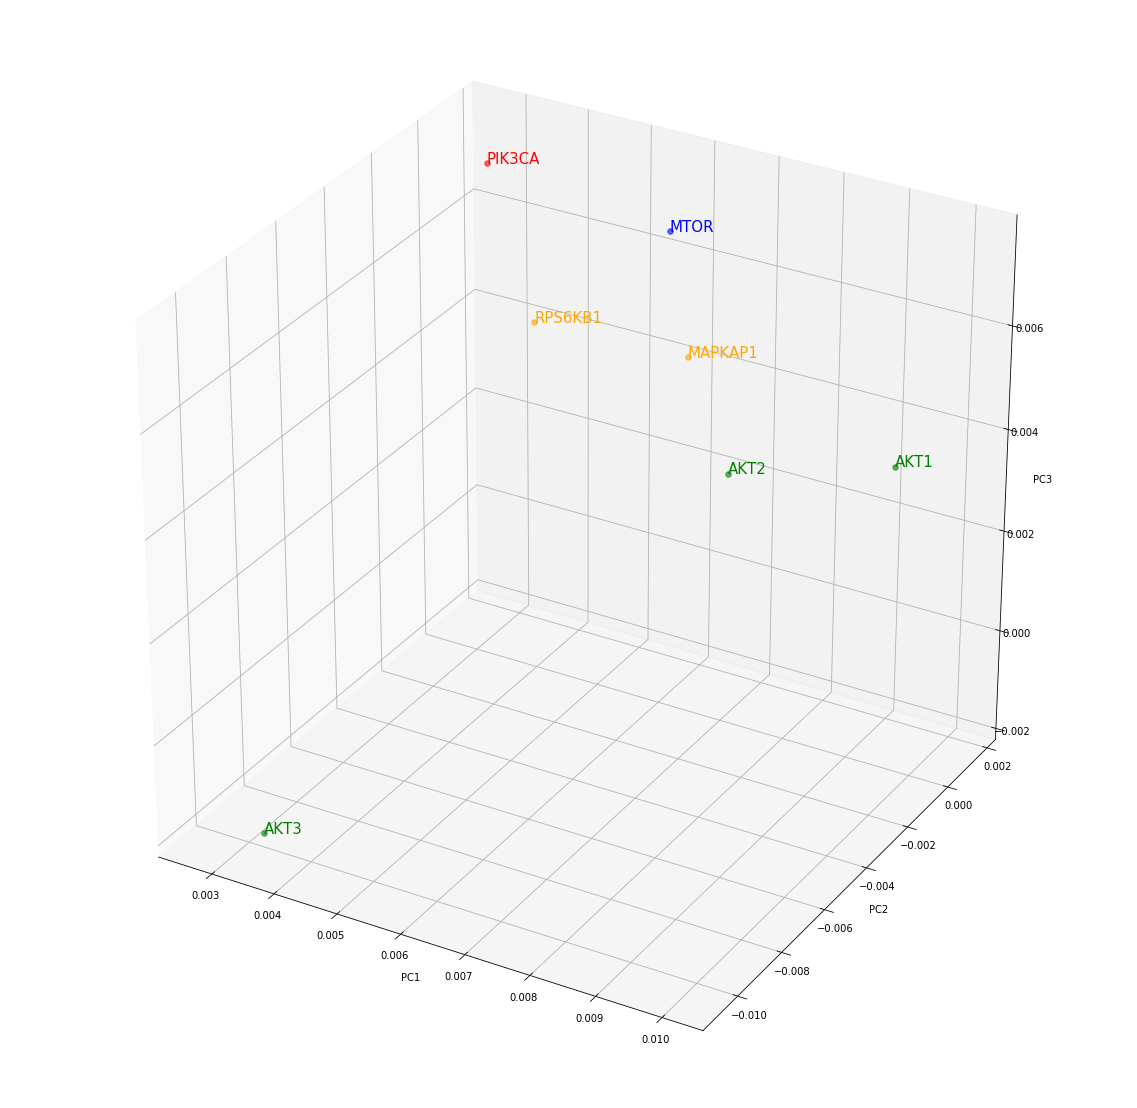

In [16]:
plot_gene_3dPCA(gemb_pca, genes, hl_idxs=hl_idxs, 
                hl_cols=['r', 'g', 'b', 'orange', 'teal'], showbg=False,
                hlfs=15, hlalpha=0.6)

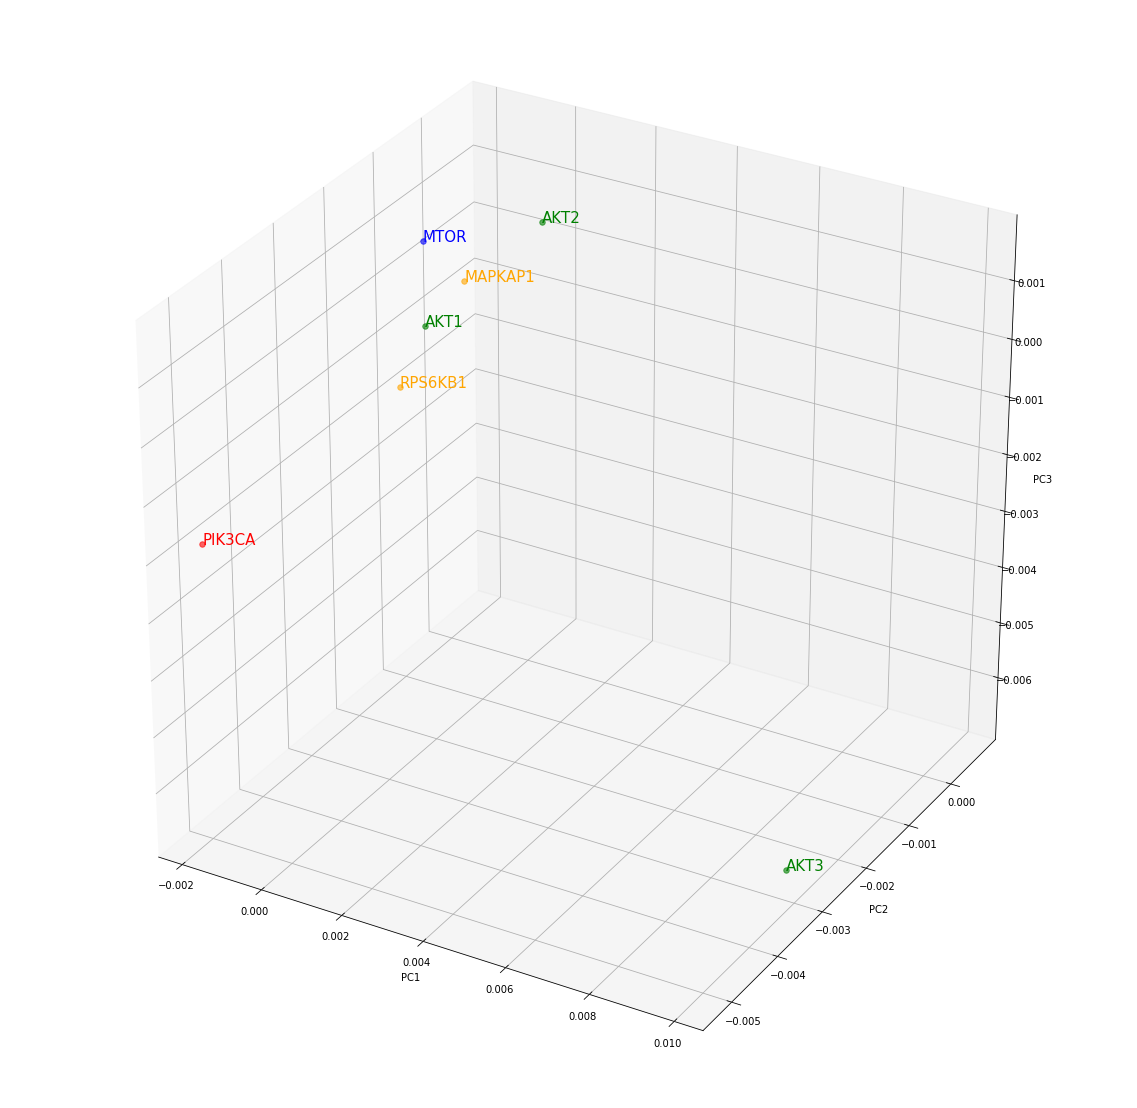

In [13]:
plot_gene_3dPCA(raw_gene_pca, genes, hl_idxs=hl_idxs, 
                hl_cols=['r', 'g', 'b', 'orange', 'teal'], showbg=False,
                hlfs=15, hlalpha=0.6)